# CS182_HW4_Coding.pdf is the instruction of this part.

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# MNIST data

In [2]:
data_filename = 'data/images.mat'
data = scipy.io.loadmat(data_filename)
data = data['train_images']

## Q1

In [21]:
from tqdm import tqdm

def k_means(k, max_iteration, data):
    centers = {}
    print(data.shape)
    # random choose k centers
    for i in range(k):
        centers[i] = data[:,:,np.random.randint(0, data.shape[2])]
    for i in tqdm(range(max_iteration)):
        classifications = {}
        for j in range(k):
            classifications[j] = []
        for img in range(data.shape[2]):
            distances = []
            for j in range(k):
                distances.append(np.linalg.norm(data[:,:,img] - centers[j]))
            classification = distances.index(min(distances))
            classifications[classification].append(data[:,:,img])
        prev_centers = centers.copy()
        for c in classifications:
            centers[c] = np.average(classifications[c], axis=0)
        center_list = []
        prevcenter_list = []
        for cent in centers:
            center_list.append(centers[cent])
        for cent in prev_centers:
            prevcenter_list.append(prev_centers[cent])
        if np.linalg.norm(np.array(center_list)-np.array(prevcenter_list))<0.001:
            print("iterations:", i)
            break
    
    return centers

cluster5 = k_means(5, 20, data)
# cluster10 = k_means(10, 200, data)
# cluster20 = k_means(20, 200, data)

(28, 28, 60000)


100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


## Q2

cluster is 5


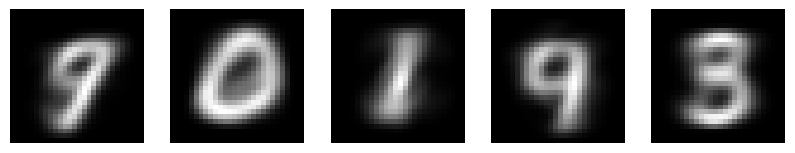

In [22]:
print("cluster is 5")
fig, axs = plt.subplots(1, 5, figsize=(5*2, 1*2.5))
for i in cluster5:
    axs[i].imshow(cluster5[i], cmap='gray')
    axs[i].axis('off')
plt.show()

# print("cluster is 10")
# fig, axs = plt.subplots(1, 10, figsize=(10*2, 1*2.5))
# for i in cluster10:
#     axs[i].imshow(cluster10[i], cmap='gray')
#     axs[i].axis('off')
# plt.show()

# print("cluster is 20")
# fig, axs = plt.subplots(1, 20, figsize=(20*2, 1*2.5))
# for i in cluster20:
#     axs[i].imshow(cluster20[i], cmap='gray')
#     axs[i].axis('off')
# plt.show()